

# <font color='GREEN' size=12px>Análise de Sentimentos do E-commerce Olist</font>
 
**Dados fornecidos espontaneamente pela plataforma Olist**


#Problema de Negócio

1. Analisar as avaliações dos clientes

2. Avaliar o sentimento do cliente em relação à marca.

3. Avaliar localização dos clientes

4. Avaliar categorias dos produtos

A missão é explorar estes dados e buscar insights sobre a satisfação dos
clientes que compram no e-commerce OLIST, assim como insights sobre as vendas e produtos.




# Análise Exploratória dos Dados 



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


## **Fonte de Dados**: 


*   Dados da Olist.
*   100.000 reviews a serem tratados e analisados
*   Intervalo 2016 a 2018




In [ ]:
# Importando as bibliotecas iniciais
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Importando NLTK para pré-processamento de Linguagem Natural
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS # stopwords é uma lista de palavras que compõe frases mas não tem valor relevante na avaliação (Exemplo: com, que, esse, da,...)


# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

A tabela olist_order_review_dataset.csv apresenta os comentários e avaliações que usaremos para nossa análise, e usaremos PLN (NLP) Processamento de Linguagem Natural para tal.

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip #importando profile report para EDA

     | 38.2MB 883kB/s
     |████████████████████████████████| 10.1MB 6.4MB/s 
     |████████████████████████████████| 645kB 37.2MB/s 
     |████████████████████████████████| 112kB 44.2MB/s 
     |████████████████████████████████| 1.1MB 37.8MB/s 
     |████████████████████████████████| 3.1MB 27.4MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 296kB 46.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248502 sha256=08d016679d1393d62ca99008ea94c30d239b2452455c5bea69223431a18f2759
  Stored in directory: /tmp/pip-ephem-wheel-cache-se75usb6/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=51764edcd197c6dd6662cf8afd71cc19ad2a1f7fda55f20c062ad12dfcee5be2
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f940

In [ ]:

# Lendo o dataset de avaliações e pegando o shape
from pandas_profiling import ProfileReport

#avaliacoes = pd.read_csv('/content/drive/MyDrive/olist_order_reviews_dataset.csv')
avaliacoes = pd.read_csv('olist_order_reviews_dataset.csv')
avaliacoes.head()
avaliacoes.shape

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


(100000, 7)

In [ ]:
profile = ProfileReport(avaliacoes, title="Reviews", html={'style':{'full_width': True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# campos com valores nulos
avaliacoes.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
!pip install pywedge

     |████████████████████████████████| 67.3MB 54kB/s 


In [ ]:
import pywedge as pw
mc = pw.Pywedge_Charts(avaliacoes, c='order_id', y = 'review_score')
graf = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

#Pré-Processamento - PLN Processamento de Linguagem Natural



*   EDA (Exploratory Data Analysis)
*   Remover STOPWORDS usando config Português-Brasil
*   Tokenizar texto usando o módulo REGEX (Regular Expressions)
*   Colocar todas as palavras em minúscula usando REGEX



In [ ]:
#Separando campos para estudo: 
#Estudar separadamente o título e Descrição da avaliações no dataset
tituloAvaliacoesData = avaliacoes['review_comment_title']
avaliacoesData = avaliacoes.drop(['review_comment_title'],axis=1)
avaliacoesData

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [ ]:
# Droppando os NaN 
avaliacoesData  = avaliacoesData.dropna()
tituloAvaliacoesData = tituloAvaliacoesData.dropna()
len(avaliacoesData)
avaliacoesData.to_csv('avaliacoesData.csv', sep=',', encoding='utf-8')

41753

In [ ]:
tituloAvaliacoesData

9                        recomendo
15                 Super recomendo
19         Não chegou meu produto 
22                           Ótimo
34                      Muito bom.
                   ...            
99967                            👍
99971           muito bom produto 
99972    Não foi entregue o pedido
99974              OTIMA EMBALAGEM
99975               Foto enganosa 
Name: review_comment_title, Length: 11715, dtype: object

In [ ]:
# Resetando os dados pro Index padrão
avaliacoes = avaliacoes.reset_index(drop=True)
avaliacoes.head(3)
avaliacoes.shape

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


(100000, 7)

In [ ]:

tituloAvaliacoesData = tituloAvaliacoesData.reset_index(drop=True)
tituloAvaliacoesData.head(10)
tituloAvaliacoesData.shape


0                  recomendo
1            Super recomendo
2    Não chegou meu produto 
3                      Ótimo
4                 Muito bom.
5                        Bom
6               Maravilhoso!
7           Entrega perfeita
8                      Ótimo
9                   MT lindo
Name: review_comment_title, dtype: object

(11715,)

A partir das células de código acima, podemos deduzir que **58% dos clientes não deixaram comentários e apenas 11,7% dos clientes se preocuparam em dar títulos aos seus comentários.**
Em seguida, iríamos pré-processar as revisões e os títulos em preparação para visualização e modelagem

In [ ]:
import nltk #já foi feito, basta baixarmos o que precisamos
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
comentarios = []
stopWords = set(stopwords.words('portuguese'))

for words in avaliacoesData['review_comment_message']:
    somenteLetras = re.sub("[^a-zA-Z]", " ",words)#somente letras
    tokens = nltk.word_tokenize(somenteLetras) #tokenizando as frases
    lowerCase = [l.lower() for l in tokens] #todas as letras passam a ser minúsculas
    filtered_result = list(filter(lambda l: l not in stopWords, lowerCase)) #Remove stopwords dos comments
    comentarios.append(' '.join(filtered_result))

In [ ]:
comentarios

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come ser usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito ser prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedo

## Visualização WORDCLOUD Comentários


In [ ]:


#Usando wordcloud para visualizar as palavras mais frequentes
unique_string=(" ").join(comentarios)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

## Unigrams, Bigrams e Trigrams dos comentários

In [ ]:
# Unigrams
co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(comentarios)
important_unigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
important_unigrams

,0
produto,18866
prazo,8543
entrega,6683
antes,5655
chegou,5643
recebi,5464
bom,4637
recomendo,4362
entregue,3899
veio,3362


In [ ]:
# bigrams
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(comentarios)
bigramsPrincipais = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bigramsPrincipais

,0
antes prazo,4207
recebi produto,1942
produto chegou,1720
produto entregue,1616
chegou antes,1465
dentro prazo,1092
bem antes,973
parab ns,950
entrega pida,900
produto bom,883


In [ ]:
# trigrams
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(comentarios)
trigramsPrincipais = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [ ]:
trigramsPrincipais

,0
chegou antes prazo,1112
bem antes prazo,708
entregue antes prazo,608
produto chegou antes,448
entrega antes prazo,433
chegou bem antes,417
produto entregue antes,374
entrega super pida,297
antes prazo previsto,287
ainda recebi produto,261


In [ ]:
# Resetar o index, renomear 
trigramsPrincipais=trigramsPrincipais.reset_index()
trigramsPrincipais.rename(columns={'index':'trigrams',0:'frequency'},inplace=True)


In [ ]:
trigramsPrincipais

,trigrams,frequency
0,chegou antes prazo,1112
1,bem antes prazo,708
2,entregue antes prazo,608
3,produto chegou antes,448
4,entrega antes prazo,433
5,chegou bem antes,417
6,produto entregue antes,374
7,entrega super pida,297
8,antes prazo previsto,287
9,ainda recebi produto,261


Observações
1. Dos unigramas, bigramas e trigramas acima, podemos **afirmar com segurança que a maioria dos clientes ficou satisfeita com o serviço de entrega, alguns outros ficaram muito satisfeitos com a qualidade dos produtos.**
2. No entanto, existem **outros que não ficaram satisfeitos** com os serviços prestados e gostaríamos de **aprofundar** esta anomalia.
Traçando as pontuações da revisão antes e depois de remover os valores NaN

<Figure size 1008x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



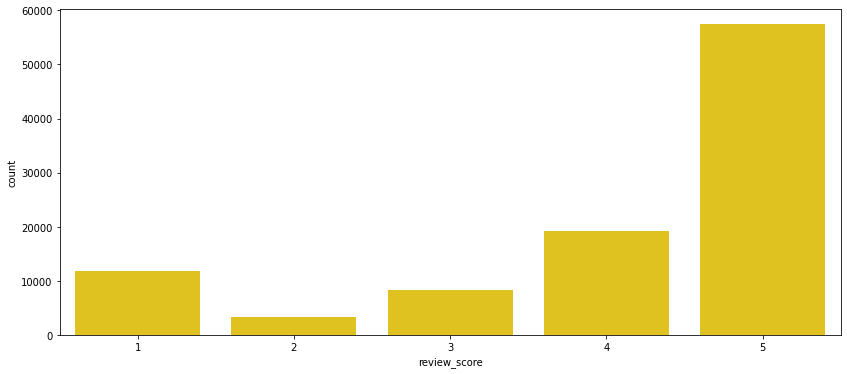

In [ ]:
# antes de remover os NaN
plt.figure(figsize = (14,6))
sns.countplot(avaliacoes['review_score'], color= 'gold')



<Figure size 1008x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



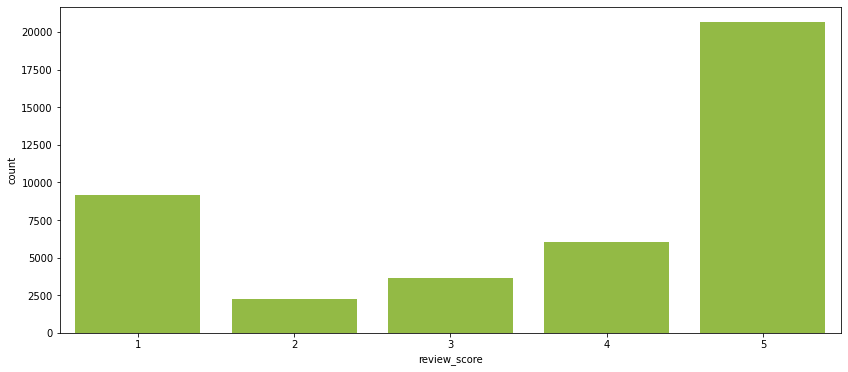

In [ ]:
# depois de remover os NaN
plt.figure(figsize = (14,6))
sns.countplot(avaliacoesData['review_score'], color= 'yellowgreen')

In [ ]:
# titulos
titulosCom = []
stopWords = set(stopwords.words('portuguese'))


for words in tituloAvaliacoesData:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenizando as frases
    lower_case = [l.lower() for l in tokens] #passando tudo para lowercase
    filtered_result = list(filter(lambda l: l not in stopWords, lower_case)) #Removendo stopwords dos comments
    
    titulosCom.append(' '.join(filtered_result))

In [ ]:
tituloAvaliacoesData

0                        recomendo
1                  Super recomendo
2          Não chegou meu produto 
3                            Ótimo
4                       Muito bom.
                   ...            
11710                            👍
11711           muito bom produto 
11712    Não foi entregue o pedido
11713              OTIMA EMBALAGEM
11714               Foto enganosa 
Name: review_comment_title, Length: 11715, dtype: object

##Visualização WORDCLOUD Títulos

<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

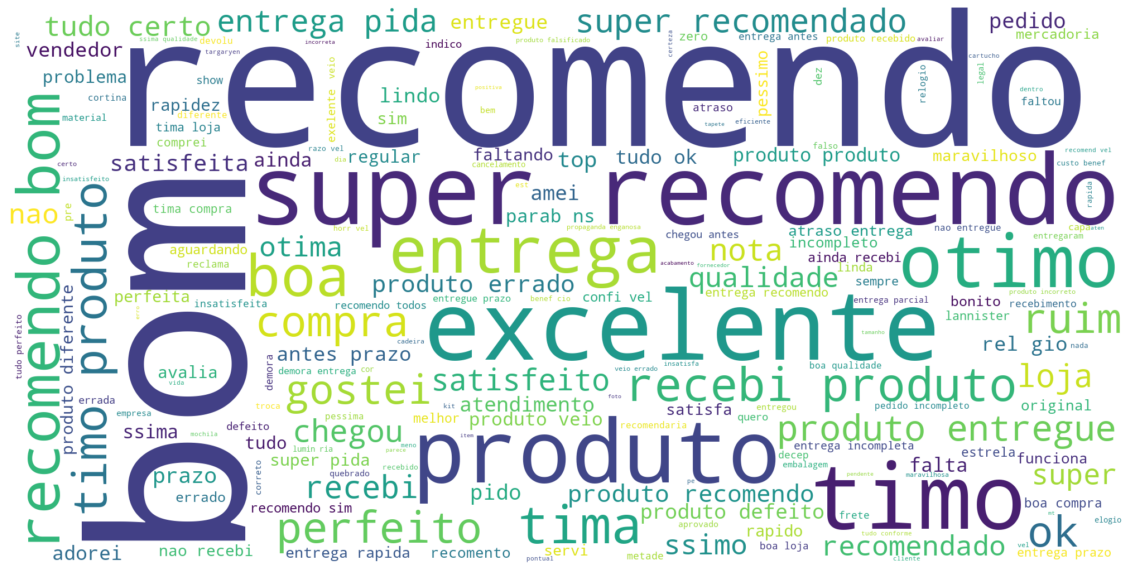

In [ ]:
#Wordcloud títulos
unique_string=(" ").join(titulosCom)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# Usando CountVectorizer para os unigrams mais importantes
co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(titulosCom)
unigrams_titlePrincipais = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [ ]:
unigrams_titlePrincipais

,0
recomendo,2085
produto,1327
bom,1321
super,901
timo,730
excelente,665
entrega,544
otimo,369
recebi,302
boa,273


In [ ]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(titulosCom)
bigrams_titlePrincipais = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [ ]:
bigrams_titlePrincipais

,0
super recomendo,681
recebi produto,131
timo produto,103
super recomendado,103
produto entregue,103
entrega pida,92
bom produto,76
tudo certo,76
produto errado,74
produto bom,66


In [ ]:
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(titulosCom)
trigrams_titlePrincipais = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [ ]:
trigrams_titlePrincipais

,0
entrega super pida,27
entrega antes prazo,15
custo benef cio,12
chegou antes prazo,11
nao recebi produto,11
produto boa qualidade,8
produto entregue prazo,8
produto veio errado,7
produto veio defeito,7
produto nao entregue,7


Pedir pelo menos 3 ou 4 palavras para os clientes, visto que com tri-grama já conseguimos nos aprofundar bastante quanto a satisfação ou não do cliente bem como o problema real ocorrido.

Text(0.5, 0, 'Review Length (words)')

Text(0, 0.5, 'Frequência')

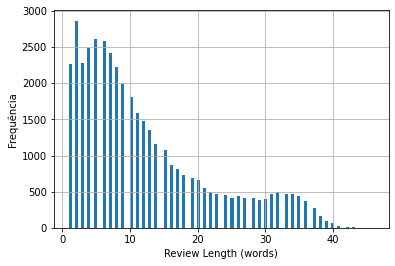

In [ ]:
# numero de palavras em cada review separando pelos espaços
words_per_review = avaliacoesData.review_comment_message.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequência')
plt.show()

In [ ]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 12.047804948147439
Skewness: 1.0577282382939468


In [ ]:

percentualScores = 100 * avaliacoesData['review_score'].value_counts()/len(avaliacoesData)
percentualScores

5    49.447944
1    21.984049
4    14.451656
3     8.777812
2     5.338539
Name: review_score, dtype: float64

##Conclusões do AED (EDA)


10.000 pessoas deram avaliações de 1 estrela 

20.000 pessoas deram avaliações de 5 estrelas

36% dos revisores de 5 estrelas deram comentários

79% dos revisores de 1 estrela deram comentários 

**Concluímos que:**

**O Cliente é mais propenso a fazer comentários quando está insatisfeito.** 

**Nota-se em evidência que termos negativos são relacionados a entrega (atrasos, demora)**

**Assim como os termos negativos, os termos positivos em sua maioria também referenciam entrega e logística.** 



# Máquina Preditiva de Análise de Sentimentos



Este seria um caso de aprendizado supervisionado, portanto, teríamos que criar uma nova coluna representando a pontuação de sentimento (1 ou 0). 1 é para palavras positivas e 0, para palavras negativas. Excluiríamos a pontuação de revisão de 3 pontos porque representa neutra e incluiríamos as pontuações de 1 e 2 como palavras negativas e as pontuações de 4 e 5 na revisão para palavras positivas.

In [ ]:

avaliacoesData['Sentiment_rating'] = np.where(avaliacoesData.review_score > 3,1,0)

# Removendo neutros
avaliacoesData = avaliacoesData[avaliacoesData.review_score != 3]


avaliacoesData['Sentiment_rating'].value_counts()

1    26680
0    11408
Name: Sentiment_rating, dtype: int64

In [ ]:
# sem score 3 que é o neutro
avaliacoesData.head()
avaliacoesData['Sentiment_rating'].shape

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,Sentiment_rating
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,1
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,1
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,1


(38088,)

In [ ]:
comentarios = []
stop_words = set(stopwords.words('portuguese'))


for words in avaliacoesData['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    
    comentarios.append(' '.join(filtered_result))

In [ ]:
co_counts = CountVectorizer(stop_words =set(stopwords.words('portuguese')),
                             ngram_range=(1,4)) # unigrams to trigrams

co_data = co_counts.fit_transform(comentarios)

In [ ]:
co_data

<38088x422326 sparse matrix of type '<class 'numpy.int64'>'
	with 870129 stored elements in Compressed Sparse Row format>

In [ ]:
# Split
X_train_co, X_test_co, y_train_co, y_test_co= train_test_split(co_data,
                                                                    avaliacoesData['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 7)

In [ ]:
y_test_co.value_counts()/y_test_co.shape[0]
# 70% sentimentos positivo
# 30% sentimentos negativos

1    0.702678
0    0.297322
Name: Sentiment_rating, dtype: float64

In [ ]:
# Definindo e treinando modelo
lr_model = LogisticRegression()
lr_model.fit(X_train_co, y_train_co)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Avaliação da Máquina

In [ ]:
# Prevendo resultados
test_pred = lr_model.predict(X_test_co)

print("Acurácia: ", accuracy_score(y_test_co,test_pred))
print("F1 score: ", f1_score(y_test_co,test_pred))




Acurácia:  0.9222893147807824
F1 score:  0.9448994787788533


In [ ]:
print("CM", confusion_matrix(y_test_co,test_pred))

CM [[1950  315]
 [ 277 5076]]


#Avaliação dos pesos de cada Palavra e Expressão (Positivos e Negativos)

In [ ]:
lr_weights = pd.DataFrame(list(zip(co_counts.get_feature_names(), # n-grams
                                   lr_model.coef_[0])), # coeficiente de regressão
                          columns= ['words','weights']) # colunas novas

sentimentosPositivos = pd.DataFrame(lr_weights.sort_values(['weights'], ascending = False)[:15]) # top 15 mais importantes reviews positivos
sentimentosPositivos

,words,weights
166120,excelente,3.279937
389525,timo,3.118963
275765,pido,2.877209
5972,adorei,2.868859
255753,otimo,2.657302
17056,amei,2.584091
272397,perfeito,2.582694
358938,satisfeito,2.423355
274716,pida,2.393982
215217,lindo,2.369722


In [ ]:
Negative_Sentiments = pd.DataFrame(lr_weights.sort_values(['weights'], ascending = False)[-15:]) # # top 15 mais importantes reviews negativos
Negative_Sentiments

,words,weights
274020,pessima,-1.630455
336270,recebi,-1.701338
153098,enviaram,-1.729856
146251,entregaram,-1.757334
107399,decepcionada,-1.758665
109952,demora,-1.782030
203233,insatisfeita,-1.796631
34507,atrasada,-1.811177
107320,decep,-1.815361
274092,pessimo,-1.837154


#Conclusão Final

Concluímos que o sentimento geral em relação a Marca é positivo, principalmente devido a boa logística e em segundo lugar pela qualidade do produto. Os exemplos de sentimentos negativos também referenciam a logística, indicando algumas falhas como atrasos e não entregas.

Evidencia-se também que pessoas com sentimentos negativos são mais propensas a deixar comentários e avaliações.


#Recomendações:

Reforçar a atenção a logística de entregas. Logística se mostrou um fator relevante tanto para avaliações positivas quanto para avaliações negativas.

Verificar constantemente e acompanhar os índices de qualidade dos produtos, pois a qualidade dos produtos oferecidos foi tão relevante para avaliações positivas quanto para avaliações negativas.

Facilitar interface para avaliações e comentários gerando um número maior de usuários oferecendo suas avaliações e comentários.




#Lista to-do com o restante da Base de Dados


**Clustering**:

Alguns clientes não escreveram um comentário. Mas por que eles estão felizes ou infelizes?

**Previsão de vendas**:

Com as informações da data de compra, prever vendas futuras.

**Desempenho de entrega**:

checar desempenho da entrega e encontrar maneiras de otimizar os tempos de entrega.

**Qualidade do produto**:

As categorias de produtos que são mais propensas à insatisfação do cliente.

**Engenharia de recursos**:

Analisar se é possível recolher mais alguma informação de meios externos que possam contribuir para o DATASET

